In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
%matplotlib inline

In [4]:
#데이터 임포트
df = pd.read_csv("C:\ds_work\data\Real estate valuation data set.csv", encoding="euc-kr")
df.head()
print(df.keys())

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [5]:
df.rename({'X1 transaction date':'transaction_date','X2 house age':'house_age',
          'X3 distance to the nearest MRT station':'distance_nearest_MRT',
          'X4 number of convenience stores':'convenience_stores',
          'X5 latitude':'latitude','X6 longitude':'longitude','Y house price of unit area':'house_price'},axis=1, inplace=True)
df.head()

,No,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
#EDA
features=df.iloc[:,1:7]
features

targets=pd.DataFrame(df.house_price, columns=["house_price"])
targets

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


,house_price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [7]:
estate=pd.concat([features,targets],axis=1)
estate

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_date      414 non-null    float64
 1   house_age             414 non-null    float64
 2   distance_nearest_MRT  414 non-null    float64
 3   convenience_stores    414 non-null    int64  
 4   latitude              414 non-null    float64
 5   longitude             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [9]:
features.describe()

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


In [10]:
#상관관계
df.corr()

,No,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
transaction_date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_nearest_MRT,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
convenience_stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [11]:
#집계
estate.groupby('house_price').size()

house_price
7.6      1
11.2     1
11.6     1
12.2     1
12.8     2
        ..
71.0     1
73.6     1
78.0     1
78.3     1
117.5    1
Length: 270, dtype: int64

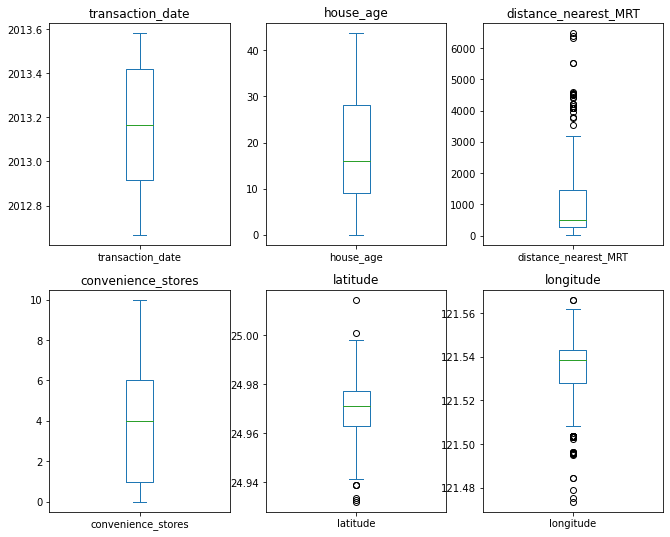

In [12]:
def boxplot_estate(feature_names, dataset): # x변수 : 4개, dataframe(df값 전체)
    i=1
    plt.figure(figsize=(11,9))  # figure 사이즈
    for col in features.columns:   # x변수에 해당하는 그래프 개수를 그려내자
        plt.subplot(2,3,i)      # 두줄에 두 칸을 만들어서 인덱스 순으로 그려내자
        plt.axis('on')          
        plt.tick_params(axis='both',left =True)
        dataset[col].plot(kind='box', subplots=True)  # 그래프 선택
        plt.title(col)
        i +=1
    plt.show()
boxplot_estate(estate.columns[:-1],estate)

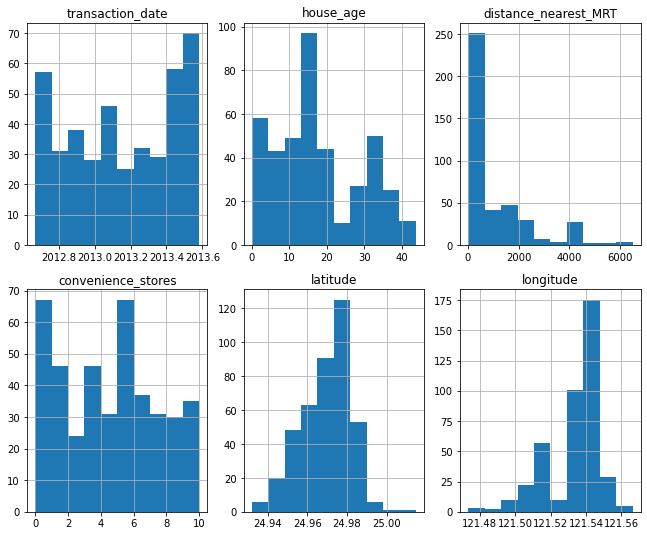

In [13]:
def histagram_estate(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9))  
    for col in features.columns:   
        plt.subplot(2,3,i)      
        plt.axis('on')          
        plt.tick_params(axis='both',left =True)
        
        dataset[col].hist() 
        plt.title(col)
        i +=1
    plt.show()
histagram_estate(estate.columns[:-1],estate)

<Figure size 792x648 with 0 Axes>

<AxesSubplot:>

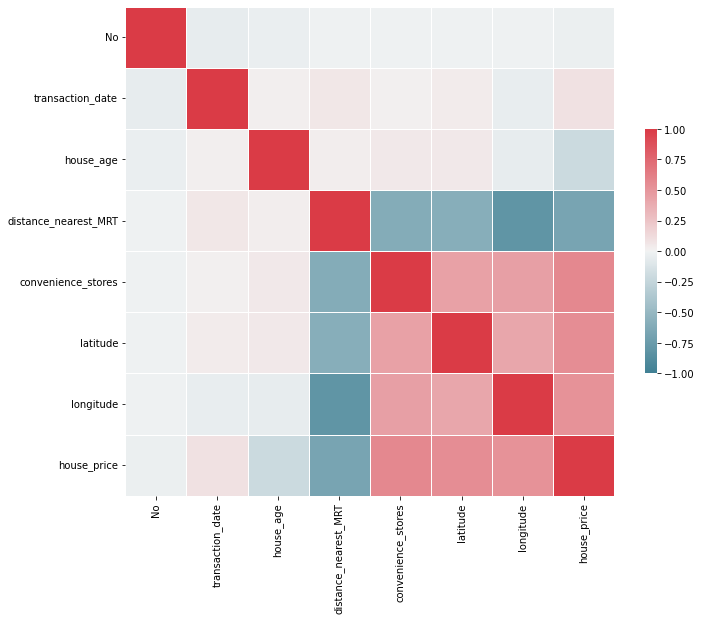

In [14]:
corr = df.corr()
cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(11,9))
sns.heatmap(corr, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

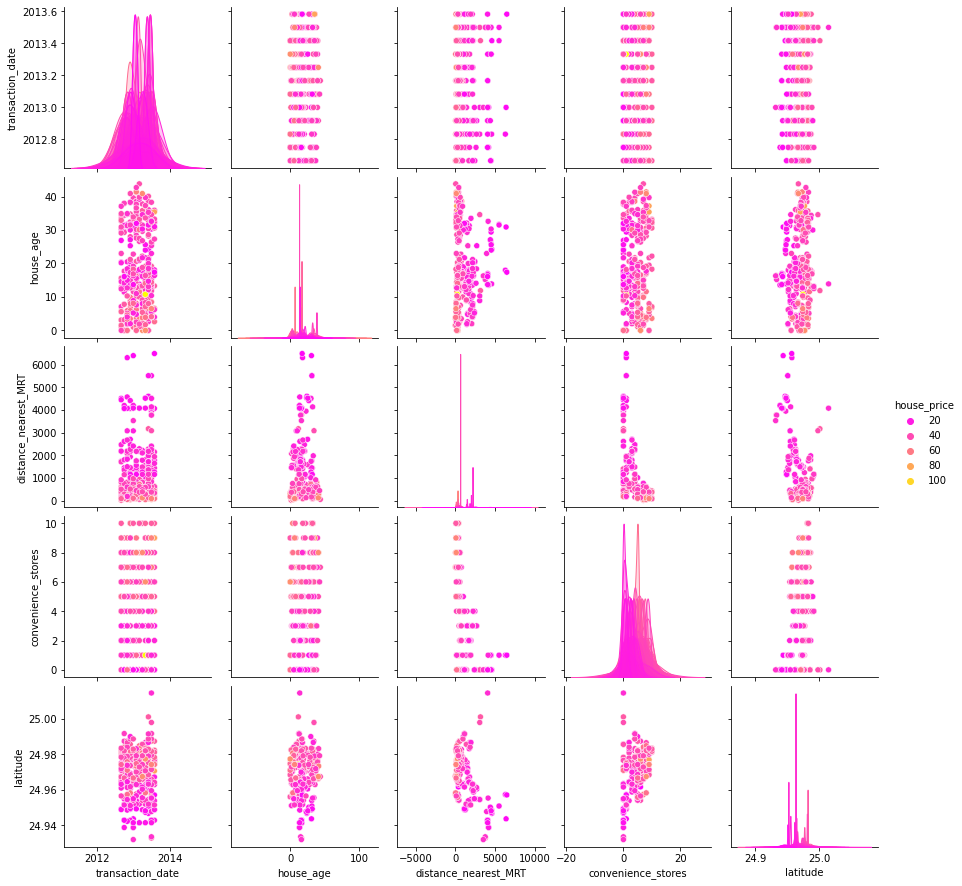

In [15]:
sns.pairplot(estate, vars=['transaction_date', 'house_age', 'distance_nearest_MRT',
'convenience_stores', 'latitude'], palette='spring', hue='house_price')
plt.show()

In [16]:
estate_2 = estate.astype('int')

In [17]:
#hold out
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(estate_2.iloc[:,1:5],estate_2.iloc[:,-1],test_size=0.25, random_state=42)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

LinearRegression()

Coefficients: 
 [-2.43874110e-01 -5.70243609e-03  1.29042256e+00  1.71191383e+01]
Mean squared error: 72.30
Coefficient of determination: 0.55


In [19]:
def RMSE(a,b, X,y ) :
    RMSE = np.sqrt(  ((y - (a*X+b)) **2).mean()     )
    return RMSE

In [20]:
maen = mean_squared_error(y_test,y_pred)
print(maen)
RMSE=np.sqrt(maen)
print(RMSE)

72.29597308749612
8.502703869211024


In [21]:
predicted = estate['house_price'].mean()
predicted

37.98019323671498

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 다중선형회귀 모델작성하기

# model 변수에 선형회귀 모델을 집어넣는다.
model =  LinearRegression() 
# 선형회귀 모델을 X_train(두개의 특성), y_train(price라는 타겟)에 적용(fit)한다.
model.fit(X_train, y_train) 
# 만들어진 모델을 원래학습시켰던 데이터에 적용해본다.
y_pred = model.predict(X_train) 

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error
# 절대평균오차 구하기
mae = mean_absolute_error(predicted, estate['house_price'])

# 우리가 만든 모델의 에러를 점검해본다. 
mae_pred = mean_absolute_error(y_pred, estate['house_price']) 

print('기준모델의 오차: {0} \n다중회귀모델의 오차: {1}'.format(mae, mae_pred))  

TypeError: Expected sequence or array-like, got <class 'float'>

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#정규화
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)


print("x_train_std mean : ",x_train_std.mean())
print("x_train_std std: ",x_train_std.std())

print("x_test_std mean: ",x_test_std.mean())
print("x_test_std std: ",x_test_std.std())

In [ ]:
#5. 모델 모형 생성

from sklearn.linear_model import LogisticRegression
모형 = LogisticRegression(max_iter = 10000)

In [ ]:
모형.fit(X_train, y_train)